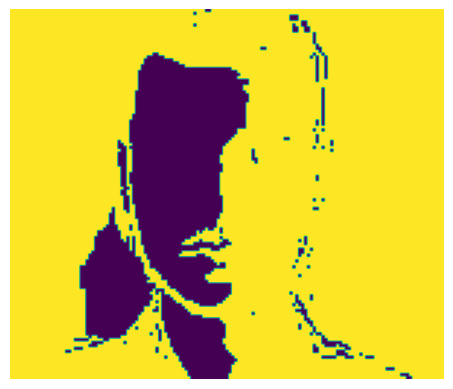

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
image = cv2.imread('image.jpg', cv2.IMREAD_GRAYSCALE)
seed_point=(10, 10)

def region_growing(image, seed, threshold):
    mask = np.zeros_like(image, dtype=np.uint8)
    stack= [seed]
    
    seed_intensity = image[seed]
    while stack:
        x, y = stack.pop()
        
        if x < 0 or x >= image.shape[0] or y < 0 or y >= image.shape[1]:
            continue
        
        if mask[x, y] == 0:
            if abs(int(image[x, y]) - int(seed_intensity)) < threshold:         
                mask[x, y] = 255

                stack.extend([(x + 1, y), (x - 1, y), (x, y + 1), (x, y - 1)])
    return mask        
threshold=50
segmented_image = region_growing (image, seed_point, threshold)
plt.imshow(segmented_image)
plt.axis('off') 
plt.show()


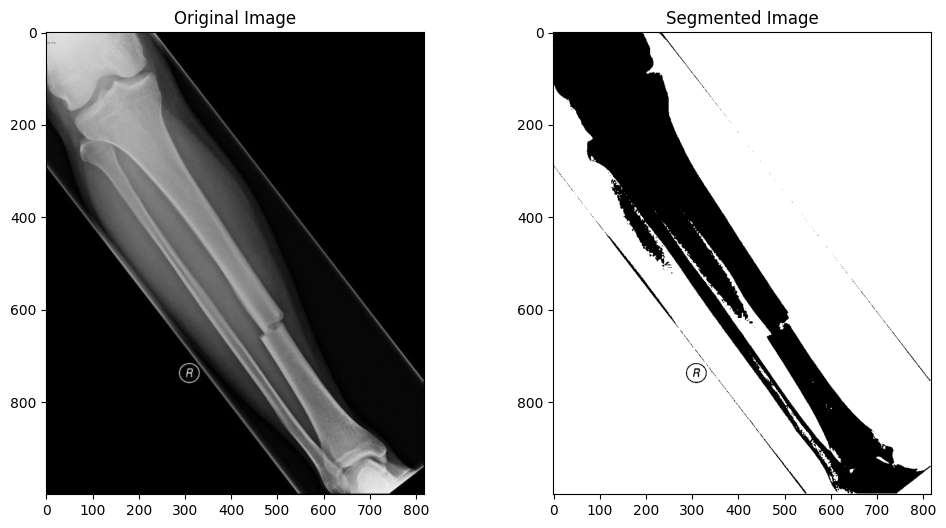

True

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


image = cv2.imread('broken-arm.jpg', cv2.IMREAD_GRAYSCALE)

threshold_value = 100


ret, thresholded_image = cv2.threshold(image, threshold_value, 255, cv2.THRESH_BINARY)


thresholded_image = cv2.bitwise_not(thresholded_image)


plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image, cmap='gray')

plt.subplot(1, 2, 2)
plt.title("Segmented Image")
plt.imshow(thresholded_image, cmap='gray')

plt.show()


cv2.imwrite('segmented_fracture.jpg', thresholded_image)


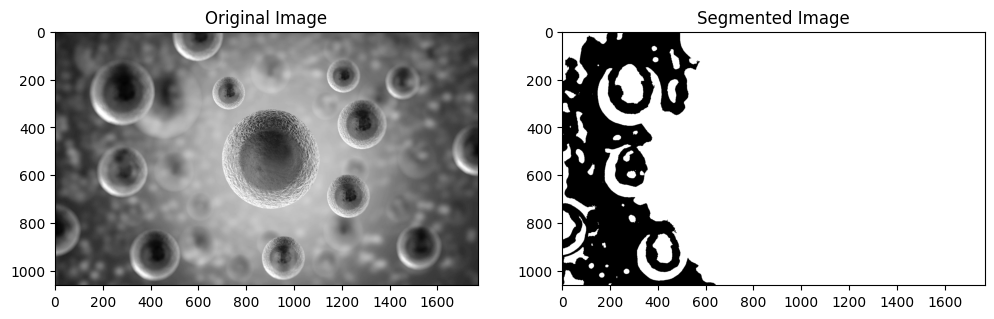

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


image = cv2.imread('stem-cell.jpg', cv2.IMREAD_GRAYSCALE)

if image is None:
    print("Error: Unable to load the image.")
else:

    x_seed, y_seed = 100, 100


    height, width = image.shape[:2]
    segmented = np.zeros((height, width), dtype=np.uint8)

    threshold = 30


    stack = [(x_seed, y_seed)]


    seed_intensity = int(image[y_seed, x_seed])


    connectivity = [(0, -1), (-1, 0), (1, 0), (0, 1), (-1, -1), (-1, 1), (1, -1), (1, 1)]

    while stack:
        x, y = stack.pop()


        if 0 <= x < width and 0 <= y < height and segmented[y, x] == 0:

            if abs(int(image[y, x]) - seed_intensity) < threshold:
                segmented[y, x] = 255


                for dx, dy in connectivity:
                    nx, ny = x + dx, y + dy
                    if 0 <= nx < width and 0 <= ny < height:
                        stack.append((nx, ny))


    segmented = cv2.bitwise_not(segmented)


    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.title("Original Image")
    plt.imshow(image, cmap='gray')

    plt.subplot(1, 2, 2)
    plt.title("Segmented Image")
    plt.imshow(segmented, cmap='gray')

    plt.show()


    cv2.imwrite('segmented_cell.jpg', segmented)


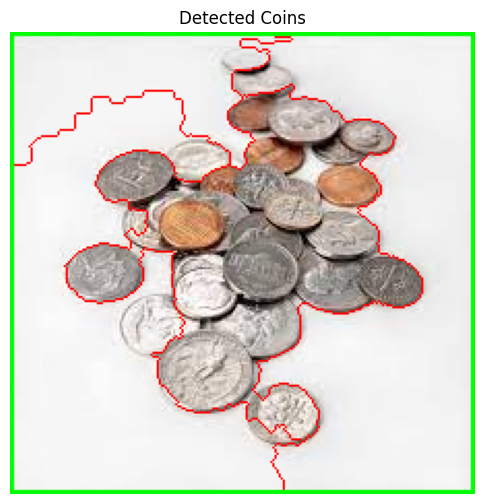

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


image = cv2.imread('coins1.jfif')


gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


blurred = cv2.GaussianBlur(gray, (5, 5), 0)


_, thresh = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)


kernel = np.ones((3, 3), np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)
sure_bg = cv2.dilate(opening, kernel, iterations=3)


dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
_, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)


sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)


_, markers = cv2.connectedComponents(sure_fg)
markers = markers + 1
markers[unknown == 255] = 0


cv2.watershed(image, markers)
image[markers == -1] = [0, 0, 255]


contours, _ = cv2.findContours(np.uint8(markers.copy()), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)





result_image = image.copy()
cv2.drawContours(result_image, contours, -1, (0, 255, 0), 2)


plt.figure(figsize=(10, 6))
plt.imshow(cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB))
plt.title("Detected Coins")
plt.axis('off')
plt.show()


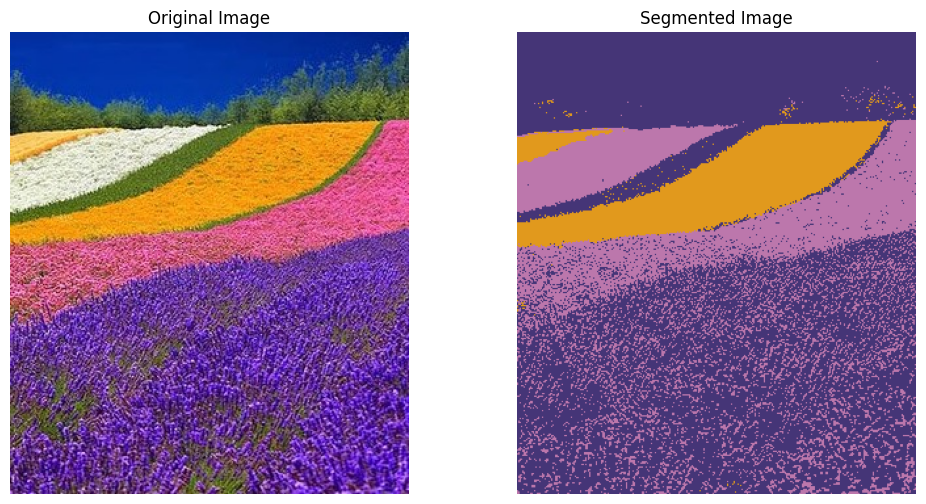

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


image = cv2.imread('flower1.jpg')


image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


pixels = image_rgb.reshape((-1, 3))


pixels = np.float32(pixels)


num_clusters = 3


criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
_, labels, centers = cv2.kmeans(pixels, num_clusters, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)


centers = np.uint8(centers)


segmented_image = centers[labels.flatten()]


segmented_image = segmented_image.reshape(image_rgb.shape)


plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image_rgb)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Segmented Image")
plt.imshow(segmented_image)
plt.axis('off')

plt.show()
